In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path_to_csv = "supermarket.csv"
data = pd.read_csv(path_to_csv,encoding="ISO-8859–1",index_col=False)
data.shape

(9994, 21)

In [3]:
data.dtypes # Checking the datatypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [4]:
data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data=data.replace(to_replace = '',value= np.nan)

In [6]:
data['Order Date'] =  pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] =  pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

# Profit Per Category

In [7]:
data.Category = pd.Categorical(data.Category)
data['Category_Code'] = data.Category.cat.codes

In [8]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Category_Code
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1


# Group By Category


In [9]:
new_data=data.set_index("Order Date").groupby([pd.Grouper(freq="M"), "Category_Code"]).sum().reset_index()


In [10]:
X = new_data['Category_Code'] #InDependent variable
Y = new_data['Profit'] #Dependent variable / target

# Sales Per Category

In [11]:
X = new_data['Category_Code'] #InDependent variable
Y = new_data['Sales'] #Dependent variable / target

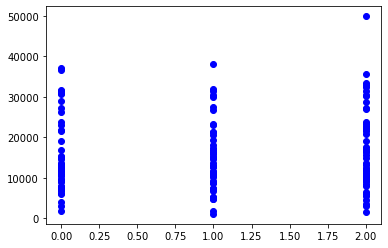

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X,Y,color = "blue")

#  Monthly Furniture Sales

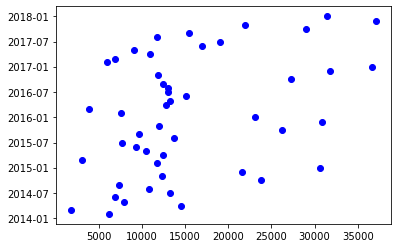

In [15]:
h=new_data.loc[new_data['Category_Code'] == 0]
Y = h['Order Date'] #InDependent variable
X = h['Sales'] #Dependent variable / target
import matplotlib.pyplot as plt

plt.scatter(X,Y,color = "blue")

# Office Supplies Monthly Sales

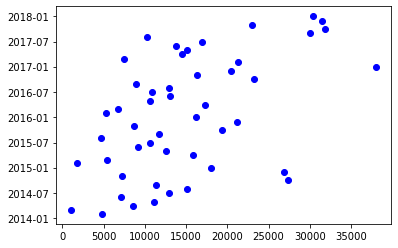

In [17]:
i=new_data.loc[new_data['Category_Code'] == 1]
Y = i['Order Date'] #InDependent variable
X = i['Sales'] #Dependent variable / target
import matplotlib.pyplot as plt

plt.scatter(X,Y,color = "blue")

# Technology Sales Per Month

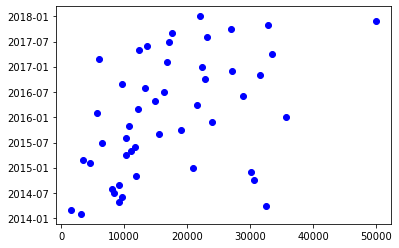

In [18]:
j=new_data.loc[new_data['Category_Code'] == 2]
Y = j['Order Date'] #InDependent variable
X = j['Sales'] #Dependent variable / target
import matplotlib.pyplot as plt

plt.scatter(X,Y,color = "blue")

<AxesSubplot:title={'center':'Sales Per Product'}, xlabel='Product ID', ylabel='Sales'>

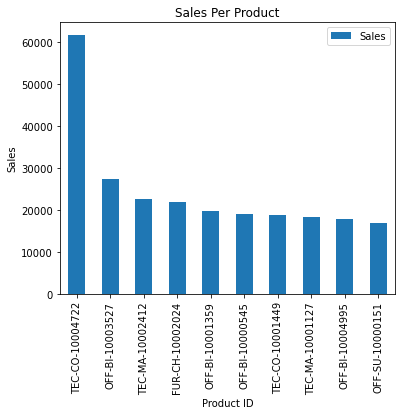

In [53]:
# using groupby get the list of products and its sum sold
my_sale=data.groupby('Product ID')[['Sales']].sum()
my_sale=my_sale.sort_values(by='Sales', ascending=False)
my_sale=my_sale.head(10)
my_sale.plot(kind='bar', title='Sales Per Product', ylabel='Sales',
         xlabel='Product ID', figsize=(6, 5))

<AxesSubplot:title={'center':'Sales Per Category'}, xlabel='Category', ylabel='Sales'>

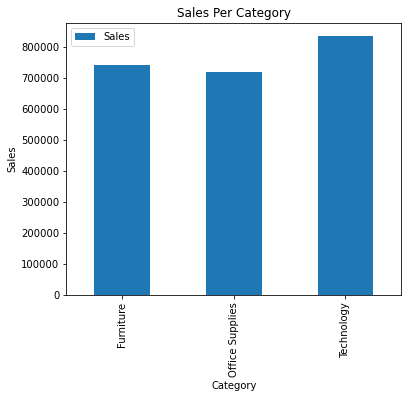

In [35]:
# using groupby get the list of products and its sum sold
my_sale=data.groupby(['Category'])[['Sales']].sum()
my_sale.plot(kind='bar', title='Sales Per Category', ylabel='Sales',
         xlabel='Category', figsize=(6, 5))

# Sales Per Sub-Category

In [33]:
# using groupby get the list of products and its sum sold
my_sale=data.groupby(['Sub-Category'])[['Sales']].sum()


<AxesSubplot:title={'center':'Sales Per Sub-Category'}, xlabel='Sub-Category', ylabel='Sales'>

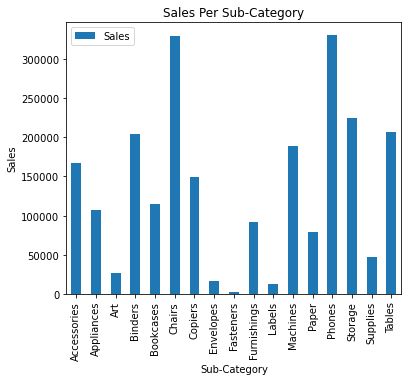

In [34]:
my_sale.plot(kind='bar', title='Sales Per Sub-Category', ylabel='Sales',
         xlabel='Sub-Category', figsize=(6, 5))